In [13]:
from sympy import *
# from sympy.vector import Vector
# import itertools

init_printing()

In [1]:
import numpy as np

In [12]:
indices = ["z       : ", "x       : ", "y       : ", "tx      : ", "ty      : ", "q       : ",
           "dx/dtx  : ", "dx/dty  : ", "dx/dq   : ",
           "dy/dtx  : ", "dy/dty  : ", "dy/dq   : ",
           "dtx/dty : ", "dtx/dq  : ",
           "dty/dtx : ", "dty/dq  : "
          ]

In [23]:
abm4_1_arr = np.array([
    355.016389113687,
   -107.757589808357,
     -1.086303783549,
     -0.315882452734,
     -0.005972304232,
     -0.090912657733,
      0.998545701367,
      0.000000743170,
     -0.000059134835,
     -0.000001489396,
      1.000150253569,
     -0.000014579332,
      0.000001484711,
     -0.000117373296,
     -0.000002972693,
     -0.000029110881
])

abm4_01_arr = np.array([
    355.016389113709,
   -107.757589808395,
     -1.086303783585,
     -0.315882452731,
     -0.005972304233,
     -0.090912657733,
      0.098590979097,
      0.000000007593,
     -0.000000672229,
     -0.000000015342,
      0.100161444961,
     -0.000000150120,
      0.000000152026,
     -0.000013435567,
     -0.000000305771,
     -0.000003001911
])

abm4_001_arr = np.array([
    355.016389113588,
   -107.757589808337,
     -1.086303783576,
     -0.315882452730,
     -0.005972304233,
     -0.090912657733,
      0.008595451391,
      0.000000000076,
     -0.000000006803,
     -0.000000000154,
      0.010162446202,
     -0.000000001506,
      0.000000015398,
     -0.000001360586,
     -0.000000029767,
     -0.000000301106 
])

rk4_arr = np.array([
     355.016389113588,
    -107.757589808334,
      -1.086303783586,
      -0.315882452730,
      -0.005972304233,
      -0.090912657733, 
       0.010000001578,
       0.000000000022,
       0.000000020147,
      -0.000000000014,
       0.010000000526,
      -0.000000000232,
       0.000000004344, 
       0.000004029463,
      -0.000000002755,
      -0.000000046403
])
err_arr = [np.abs(rk4_arr[i] - abm4_001_arr[i]) for i in range(len(rk4_arr))]


In [24]:
for i in range(len(err_arr)):
    print(indices[i] + str(err_arr[i]))

z       : 0.0
x       : 2.9984903449076228e-12
y       : 1.000000082740371e-11
tx      : 0.0
ty      : 0.0
q       : 0.0
dx/dtx  : 0.0014045501869999998
dx/dty  : 5.3999999999999994e-11
dx/dq   : 2.695e-08
dy/dtx  : 1.4e-10
dy/dty  : 0.00016244567599999968
dy/dq   : 1.274e-09
dtx/dty : 1.1054000000000001e-08
dtx/dq  : 5.390049e-06
dty/dtx : 2.7012e-08
dty/dq  : 2.54703e-07


In [6]:
z, x, y, tx, ty, q, v = symbols("z x y theta_x theta_y q v")
B1 = Function("B1")(x,y,z)
B2 = Function("B2")(x,y,z)
B3 = Function("B3")(x,y,z)

In [7]:
def f_x(z,x,y,tx,ty,q,v):
    return tx

def f_y(z,x,y,tx,ty,q,v):
    return ty

def f_tx(z,x,y,tx,ty,q,v):
    return q*v*sqrt(1+tx**2+ty**2)*(ty*(tx*B1+B3)-(1+tx**2)*B2)

def f_ty(z,x,y,tx,ty,q,v):
    return q*v*sqrt(1+tx**2+ty**2)*(-tx*(ty*B2 + B3)+(1+ty**2)*B1)

def f_q(z,x,y,tx,ty,q,v):
    return 0

# Jacobian
### J1

In [8]:
(diff(f_x(z,x,y,tx,ty,q,v), x),
 diff(f_x(z,x,y,tx,ty,q,v), y),
 diff(f_x(z,x,y,tx,ty,q,v), tx), 
 diff(f_x(z,x,y,tx,ty,q,v), ty),
 diff(f_x(z,x,y,tx,ty,q,v), q))

(0, 0, 1, 0, 0)

### J2

In [9]:
(diff(f_y(z,x,y,tx,ty,q,v), x),
 diff(f_y(z,x,y,tx,ty,q,v), y),
 diff(f_y(z,x,y,tx,ty,q,v), tx), 
 diff(f_y(z,x,y,tx,ty,q,v), ty),
 diff(f_y(z,x,y,tx,ty,q,v), q))

(0, 0, 0, 1, 0)

### J3

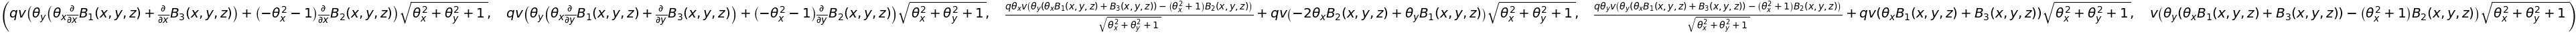

In [22]:
df_tx_tx = diff(f_tx(z,x,y,tx,ty,q,v), tx)
df_tx_ty = diff(f_tx(z,x,y,tx,ty,q,v), ty)
df_tx_q  = diff(f_tx(z,x,y,tx,ty,q,v), q)
(diff(f_tx(z,x,y,tx,ty,q,v), x),
 diff(f_tx(z,x,y,tx,ty,q,v), y),
 diff(f_tx(z,x,y,tx,ty,q,v), tx), 
 diff(f_tx(z,x,y,tx,ty,q,v), ty),
 diff(f_tx(z,x,y,tx,ty,q,v), q))

In [29]:
latex(diff(f_ty(z,x,y,tx,ty,q,v), q))

'v \\left(- \\theta_{x} \\left(\\theta_{y} \\operatorname{B_{2}}{\\left (x,y,z \\right )} + \\operatorname{B_{3}}{\\left (x,y,z \\right )}\\right) + \\left(\\theta_{y}^{2} + 1\\right) \\operatorname{B_{1}}{\\left (x,y,z \\right )}\\right) \\sqrt{\\theta_{x}^{2} + \\theta_{y}^{2} + 1}'

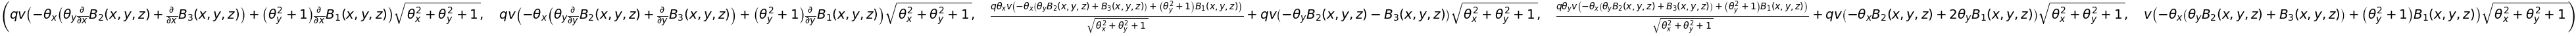

In [24]:
df_ty_tx = diff(f_ty(z,x,y,tx,ty,q,v), tx)
df_ty_ty = diff(f_ty(z,x,y,tx,ty,q,v), ty)
df_ty_q  = diff(f_ty(z,x,y,tx,ty,q,v), q)
(diff(f_ty(z,x,y,tx,ty,q,v), x),
 diff(f_ty(z,x,y,tx,ty,q,v), y),
 diff(f_ty(z,x,y,tx,ty,q,v), tx), 
 diff(f_ty(z,x,y,tx,ty,q,v), ty),
 diff(f_ty(z,x,y,tx,ty,q,v), q))

In [12]:
(diff(f_q(z,x,y,tx,ty,q,v), x),
 diff(f_q(z,x,y,tx,ty,q,v), y),
 diff(f_q(z,x,y,tx,ty,q,v), tx), 
 diff(f_q(z,x,y,tx,ty,q,v), ty),
 diff(f_q(z,x,y,tx,ty,q,v), q))

(0, 0, 0, 0, 0)

In [ ]:
df_tx_tx - (q*v*tx*(-B2*(tx**2+1)+ty*(B1*tx+B3)))/sqrt(1+tx**2+ty**2) - q*v*(B1*ty - 2*B2*tx)*sqrt(1+tx**2+ty**2)

In [ ]:
df_tx_ty - (q*v*ty*(-B2*(tx**2+1)+ty*(B1*tx+B3)))/sqrt(1+tx**2+ty**2) - q*v*(B1*tx + B3)*sqrt(1+tx**2+ty**2)

In [ ]:
df_tx_q - v*sqrt(1+tx**2+ty**2)*(ty*(tx*B1+B3)-(1+tx**2)*B2)

In [ ]:
df_ty_tx - (q*v*tx*(B1*(ty**2+1)-tx*(B2*ty+B3)))/sqrt(1+tx**2+ty**2) - q*v*(-B2*ty - B3)*sqrt(1+tx**2+ty**2)

In [ ]:
df_ty_ty - (q*v*ty*(B1*(ty**2+1)-tx*(B2*ty+B3)))/sqrt(1+tx**2+ty**2) - q*v*(2*B1*ty - B2*tx)*sqrt(1+tx**2+ty**2)

In [ ]:
df_ty_q - v*sqrt(1+tx**2+ty**2)*(B1*(ty**2+1)-tx*(B2*ty+B3))